<a href="https://colab.research.google.com/github/JonathanLehner/cassini_2021_nature_discoverer/blob/main/sentinel2_processing/Drive_%2B_Convert_TIF_to_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and Extract tif_images

## original idea
using this: https://pypi.org/project/geotiff/

article [here](https://kipling.medium.com/using-a-geotiff-and-a-touch-of-python-to-make-topographic-images-1c1b0349551b)

[more](https://kipling.medium.com/the-geotiff-python-package-bfa6765d7bd6?source=follow_footer---------0----------------------------) on the geotiff library

## actual idea

- uses rasterio


## setup

### User Inputs + Config

```

iml 2021 tutorial dropbox: https://www.dropbox.com/sh/23op1s2uvftz16f/AAC4XyzjZjuCu6iImBnx2f2pa?dl=1
iml 2021 tutorial out: /content/drive/MyDrive/ethz_s2021/IML_2021/keyframes/2021_tutorials

```

In [1]:
this_url = "https://www.dropbox.com/sh/9sf0rizwk844g7x/AADA-DIdelKzPpYBE6uc0hUpa?dl=1" #@param {type:"string"}
download_files = False #@param {type:"boolean"}
drive_save_folder = "/content/drive/MyDrive/Programming/CASSINI_hackathon_workspace/sentinel-2 pngs/valais2020_with_intpt" #@param {type:"string"}
# set url to tif_images folder. It doesn't have to point to dropbox, just to something
# that will download a zip file of the tif_imagess



In [2]:
import os

try:
    print("the current directory is already: ", the_wd)
except:
    machine_dir = os.getcwd()
    the_wd = os.path.join(machine_dir, "tif_images_processing")
    os.mkdir(the_wd)
    os.chdir(the_wd)

    output_loc = os.path.join(machine_dir, "converted_to_img")
    print("files will be stored on the local machine running at: \n", os.getcwd())

files will be stored on the local machine running at: 
 /content/tif_images_processing


In [3]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
# after you allow the authentication, you can work using the path "/content/drive/My Drive"

Mounted at /content/drive


In [4]:
# create drive folder if needed
if not os.path.isdir(drive_save_folder):
    os.mkdir(drive_save_folder)
    print("created folder")
    # make a place to store outputs if one does not exist

print(drive_save_folder)    

created folder
/content/drive/MyDrive/Programming/CASSINI_hackathon_workspace/sentinel-2 pngs/valais2020_with_intpt


### install + import

In [5]:
import zipfile
from datetime import datetime
import os
from os import listdir
from os.path import isfile, join
import pprint as pp
from natsort import natsorted
import pandas as pd
import requests
import string
import re
import time
import distutils
import distutils.core

In [6]:
st = time.time()

### functions

#### generic

In [7]:
# formats all notebook cells to not look ugly

from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [8]:

def fast_scandir(dirname):
    # return all subfolders in a given filepath

    subfolders = [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders # list

#### requests lib helpers

In [9]:
def URL_string_filter(text):
    custom_printable = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ._"

    filtered = ''.join((filter(lambda i: i in custom_printable, text)))

    return filtered 


def getFilename_fromCd(cd):
    #Get filename from content-disposition
    custom_printable = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ."

    if not cd:
        return None
    fname = re.findall('filename=(.+)', cd)
    # fname = re.findall('filename=', cd)
    if len(fname) > 0:
        output = fname[0]
    elif cd.find('/'):
        possible_fname = url.rsplit('/', 1)[1]
        output = URL_string_filter(possible_fname)
    else:
        output = None
    return output

## download zip file from dropbox

In [10]:
print("starting to download and save file ")

r = requests.get(this_url, allow_redirects=True)
names = getFilename_fromCd(r.headers.get('content-disposition'))
fixed_fnames = names.split(";") # split the multiple results
this_filename = URL_string_filter(fixed_fnames[0])
this_filename = "dropboxexport" + this_filename

save_loc = join(the_wd, this_filename)

open(save_loc, 'wb').write(r.content)

print("saved zip file - ", datetime.now())

starting to download and save file 
saved zip file -  2021-06-20 11:58:29.619033



## extract zip

In [11]:
print_dir = False #@param {type:"boolean"}
zf = zipfile.ZipFile(save_loc)
if print_dir:
    pp.pprint(zf.printdir(), indent=5, compact=True) # depending on any other subfolders, printout can be massive
zf.extractall()

print("extracted zip file - ", datetime.now())

extracted zip file -  2021-06-20 12:00:39.012260


In [12]:
# remove zip file once extracted
# wrapped in try/except so script doesn't error out when multiple cells are re-run

try:
    os.remove(save_loc)
    del save_loc
    print("deleted origin zip file post extraction - ", datetime.now())
except:
    print("unable to delete original zipfile - check if exists")


deleted origin zip file post extraction -  2021-06-20 12:00:39.022530


## print filepath summary

In [13]:
current_wd = os.getcwd()
print("The current working directory is: \n", current_wd)
print("\nA list of all files in working directory is:")
local_files = natsorted([f for f in listdir(current_wd) if isfile(os.path.join(current_wd, f))])
pp.pprint(local_files)

print("\nA list of all subfolders is:")
pp.pprint(fast_scandir(current_wd))

print("\n current server date & time: ", datetime.now())

The current working directory is: 
 /content/tif_images_processing

A list of all files in working directory is:
['vs_aoi_s2_l2a_10m_swiss_202001021029.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001031046.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001051039.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001071030.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001081048.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001121029.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001131047.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001151039.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001171028.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001181048.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001201037.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001221029.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001231053.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001251039.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001271026.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001281048.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001301037.tif',
 'vs_aoi_s2_l2a_10m_swiss_202002011028.tif',
 'vs_aoi_s2_l2a_10m_swiss_202002021045.tif',
 'vs_aoi_s2_l2a_10m_swiss_202002

# TIF conversion with geotiff

https://pypi.org/project/geotiff/

## installs and imports 

- includes stuff for FPDF
- [python FFMPEG lib](https://github.com/PyAV-Org/PyAV)



In [14]:
%%capture
!pip install -U katna
!pip install -U ntpath
!pip install -U tqdm
!pip install -U texthero
!pip install -U wordninja
!pip install clean-text[gpl]
!pip install -U fpdf2
!pip install -U moviepy
!pip install -U proglog
!pip install -U av
!pip install -U geotiff
!pip install -U PIL
!pip install -U pypng

import math
import os
import pprint as pp
import time
from datetime import datetime
from os import listdir
from os.path import join, isfile

from google.colab import data_table
import wordninja
from cleantext import clean
from fpdf import FPDF
from natsort import natsorted
from tqdm.auto import tqdm
import ntpath
import av
import png



In [15]:
%%capture
!pip install sentinelsat
!pip install rasterio
!pip install folium
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install -U geotiff

import folium
import os
import numpy as np

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt 
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona

## functions for conversion

### generic

In [16]:
def cleantxt_wrap(ugly_text):
    # a wrapper for clean text with options different than default

    # https://pypi.org/project/clean-text/
    cleaned_text = clean(ugly_text,
                         fix_unicode=True,  # fix various unicode errors
                         to_ascii=True,  # transliterate to closest ASCII representation
                         lower=True,  # lowercase text
                         no_line_breaks=True,  # fully strip line breaks as opposed to only normalizing them
                         no_urls=True,  # replace all URLs with a special token
                         no_emails=True,  # replace all email addresses with a special token
                         no_phone_numbers=True,  # replace all phone numbers with a special token
                         no_numbers=False,  # replace all numbers with a special token
                         no_digits=False,  # replace all digits with a special token
                         no_currency_symbols=True,  # replace all currency symbols with a special token
                         no_punct=True,  # remove punctuations
                         replace_with_punct="",  # instead of removing punctuations you may replace them
                         replace_with_url="<URL>",
                         replace_with_email="<EMAIL>",
                         replace_with_phone_number="<PHONE>",
                         replace_with_number="<NUM>",
                         replace_with_digit="0",
                         replace_with_currency_symbol="<CUR>",
                         lang="en"  # set to 'de' for German special handling
                         )

    return cleaned_text


def beautify_filename(filename, num_words=20, start_reverse=False,
                      word_separator="_"):
    # takes a filename stored as text, removes extension, separates into X words ...
    # and returns a nice filename with the words separateed by
    # useful for when you are reading files, doing things to them, and making new files

    filename = str(filename)
    index_file_Ext = filename.rfind('.')
    current_name = str(filename)[:index_file_Ext]  # get rid of extension
    clean_name = cleantxt_wrap(current_name) # wrapper with custom defs
    file_words = wordninja.split(clean_name)
    # splits concatenated text into a list of words based on common word freq
    if len(file_words) <= num_words:
        num_words = len(file_words)

    if start_reverse:
        t_file_words = file_words[-num_words:]
    else:
        t_file_words = file_words[:num_words]

    pretty_name = word_separator.join(t_file_words)  # see function argument

    # NOTE IT DOES NOT RETURN THE EXTENSION
    return pretty_name[: (len(pretty_name) - 1)]  # there is a space always at the end, so -1

import shutil
def move2completed(from_dir, filename, new_folder='completed', verbose=False):
    
    # this is the better version
    old_filepath = join(from_dir, filename)

    new_filedirectory = join(from_dir, new_folder)

    if not os.path.isdir(new_filedirectory):
        os.mkdir(new_filedirectory)
        if verbose:
            print("created new directory for files at: \n", new_filedirectory)

    new_filepath = join(new_filedirectory, filename)

    try:
        shutil.move(old_filepath, new_filepath)
        print("successfully moved the file {} to */completed.".format(filename))
    except:
        increase_font()
        print("ERROR! unable to move file to \n{}. Please investigate".format(new_filepath))

print("generic fns loaded - ", datetime.now())

generic fns loaded -  2021-06-20 12:02:27.523366


In [17]:
def extract_zip_URL(URL, folder_path):
    print("\n\nstarting to download and save file ")

    r = requests.get(URL, allow_redirects=True)
    names = getFilename_fromCd(r.headers.get('content-disposition'))
    fixed_fnames = names.split(";") # split the multiple results
    this_filename = URL_string_filter(fixed_fnames[0])
    this_filename = "dropboxexport" + this_filename

    save_loc = join(folder_path, this_filename)

    open(save_loc, 'wb').write(r.content)

    print("saved zip file - ", datetime.now())

    zf = zipfile.ZipFile(save_loc)
    zf.extractall(path=folder_path)

    print("extracted zip file - ", datetime.now())

    try:
        os.remove(save_loc)
        del save_loc
        print("deleted origin zip file post extraction - ", datetime.now())
    except:
        print("unable to delete original zipfile - check if exists")

    local_files = natsorted([f for f in listdir(folder_path) if isfile(os.path.join(folder_path, f))])
    if len(local_files) < 10:
        pp.pprint(local_files)
    else:
        print("there are {} files in folder: {}".format(len(local_files), current_wd))

    print("\nA list of all subfolders is:")
    pp.pprint(fast_scandir(folder_path))




### load iamge

In [18]:
from pathlib import Path

def load_landsat_image_dir(img_folder, bands):
    # ONLY USEFUL IF BANDS ARE IN DIFFERENT FILE
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the landsat images end with *_SR_B#.TIF, we will use it to locate the correct file
        file = next(path.glob(f'*_SR_{band}.tif'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image

def load_landsat_image_single(imgpath):
    # ONLY USEFUL IF BANDS ARE IN DIFFERENT FILE
    image = {}
    datboi  = rio.open(imgpath)
    bands = datboi.indexes
    for band in bands:
        # considering the landsat images end with *_SR_B#.TIF, we will use it to locate the correct file
        this_label = "B" + str(band)
        image.update({this_label: datboi.read(band)})

    return image

### convert image tif -> png


In [19]:
from geotiff import GeoTiff
from PIL import Image
import numpy as np
import os
from os.path import join, isfile
import png
import matplotlib
from google.colab import files

def convert_tif_to_png_sus(tiff_file, output_folder):

    basename = beautify_filename(os.path.basename(tiff_file))
    grey_loc = join(output_folder, basename + "greyscale_dem.png")
    color1_loc = join(output_folder, basename + "color_dem.png")
    slope_loc = join(output_folder, basename + "slope_dem.png")
    color_and_slope_loc = join(output_folder, basename + "color+slope_dem.png")

    geoTiff = GeoTiff(tiff_file)
    array = geoTiff.read()

    img_array = 255*((array - np.amin(array))/(np.amax(array)- np.amin(array)))
    # Image.fromarray(img_array).convert("RGB").save(grey_loc)
    img_array = (255.0 / img_array.max() * (img_array - img_array.min())).astype(np.uint8)
    im = Image.fromarray(img_array)
    im.save(grey_loc)

    colorize = lambda k: [255*0.6-k*0.5,254*0.5+k*0.5,255-k]
    color_img_array = np.array([[colorize(x) for x in y] for y in img_array])
    # Image.fromarray(color_img_array.astype(np.uint8)).save(color1_loc)
    png.from_array(color_img_array, 'L').save(color1_loc)


    shade_array = np.gradient(array)[0]
    shade_array = ((shade_array - np.amin(shade_array))/(np.amax(shade_array)- np.amin(shade_array)))
    shade_img_array = 255*((shade_array - np.amin(shade_array))/(np.amax(shade_array)- np.amin(shade_array)))
    # Image.fromarray(shade_img_array).convert("RGB").save(slope_loc)
    png.from_array(shade_img_array, 'L').save(slope_loc)


    shaded_color_img_array = color_img_array*np.array([[[x, x, x] for x in y] for y in shade_array])
    # Image.fromarray(shaded_color_img_array.astype(np.uint8)).save(color_and_slope_loc)
    png.from_array(shaded_color_img_array, 'L').save(color_and_slope_loc)



# new and improved

def convert_tif_to_png_v2(full_input_path, output_folder, download_pic=False):
    img = load_landsat_image_single(full_input_path)
    basename = beautify_filename(os.path.basename(full_input_path))


    # stack the layers to create a cube
    rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)

    # normalize the values
    rgb = rgb/rgb.max() * 2

    # display the image with a slightly increased figure size
    plt.figure(figsize=(10,10), tight_layout=True, clear=True)
    plt.imshow(rgb, norm=matplotlib.colors.Normalize(), interpolation ="lanczos")

    plt.title(os.path.basename(full_input_path))
    outname = "[conv to pretty image]" + basename + ".png"
    plt.savefig(join(output_folder, outname), dpi=300, facecolor='w', edgecolor='w',
            transparent=True, bbox_inches="tight")
    if download_pic:
        files.download(join(output_folder, outname))

    plt.close()


## load files etc

In [20]:
tif_imagess_dir_path = current_wd

In [21]:
from natsort import natsorted
# iterate through and grab files:

files_to_munch = natsorted([f for f in listdir(tif_imagess_dir_path) if isfile(os.path.join(tif_imagess_dir_path, f))])
total_files_1 = len(files_to_munch)
removed_count_1 = 0
approved_files = []
# remove non-tif_images files
for prefile in files_to_munch:
    if prefile.endswith(".tif"):
        approved_files.append(prefile)
    else:
        files_to_munch.remove(prefile)
        removed_count_1 += 1

print("out of {0:3d} file(s) originally in the folder, ".format(total_files_1),
      "{0:3d} non-tif_images files were removed".format(removed_count_1))
print('\n {0:3d} tif_images file(s) in folder will be transcribed.'.format(len(approved_files)))

# split_value = "vs_aoi_s2_l2a_10m_swiss_201907221049.tif"

# split_point = approved_files.index(split_value)

# approved_files = approved_files[(split_point+1):]

if len(approved_files) >25:
    pp.pprint(approved_files[:10]) 
    print("...")
else:
    pp.pprint(approved_files)

out of 224 file(s) originally in the folder,    4 non-tif_images files were removed

 216 tif_images file(s) in folder will be transcribed.
['vs_aoi_s2_l2a_10m_swiss_202001021029.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001031046.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001051039.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001071030.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001081048.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001121029.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001131047.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001151039.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001171028.tif',
 'vs_aoi_s2_l2a_10m_swiss_202001181048.tif']
...


### shape files


In [22]:
directory_shapes = join(the_wd, "shape_files")

if not os.path.isdir(directory_shapes):
    os.mkdir(directory_shapes)
    print("created folder")
    # make a place to store outputs if one does not exist

bouldering_shapes_URL = "https://www.dropbox.com/sh/6woym4j24ex5zhz/AADzos2OU5XDpWlRVCycLRqca?dl=1"
points_of_interest_URL = "https://www.dropbox.com/sh/5xorzb90x2dkyiw/AAANC3eiuWjolSeYoGowAV8na?dl=1"

extract_zip_URL(bouldering_shapes_URL, directory_shapes)
extract_zip_URL(points_of_interest_URL, directory_shapes)

created folder


starting to download and save file 
saved zip file -  2021-06-20 12:02:28.931366
extracted zip file -  2021-06-20 12:02:28.933326
deleted origin zip file post extraction -  2021-06-20 12:02:28.933677
['rock_climbing_valais_locs.dbf',
 'rock_climbing_valais_locs.shp',
 'rock_climbing_valais_locs.shx']

A list of all subfolders is:
[]


starting to download and save file 
saved zip file -  2021-06-20 12:02:31.515193
extracted zip file -  2021-06-20 12:02:31.755342
deleted origin zip file post extraction -  2021-06-20 12:02:31.755892
there are 26 files in folder: /content/tif_images_processing

A list of all subfolders is:
['/content/tif_images_processing/shape_files/valais_exp_1_query.txt',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_shp']


In [23]:
approved_shp_files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(directory_shapes):
    for prefile in f:
        if prefile.endswith(".shp") or prefile.endswith(".shx"):
            fullpath = os.path.join(r, prefile)
            approved_shp_files.append(fullpath)

approved_shp_files = natsorted(approved_shp_files)

if len(approved_shp_files) < 10:
    pp.pprint(approved_shp_files)
else:
    pp.pprint(approved_shp_files[:10])
    print("\n\n and many more")


['/content/tif_images_processing/shape_files/CASSINI_key_01_planet_osm_line_lines.shp',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_planet_osm_line_lines.shx',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_planet_osm_point_points.shp',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_planet_osm_point_points.shx',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_planet_osm_polygon_polygons.shp',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_planet_osm_polygon_polygons.shx',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_shp/CASSINI_key_01_planet_osm_line_lines.shp',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_shp/CASSINI_key_01_planet_osm_line_lines.shx',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_shp/CASSINI_key_01_planet_osm_point_points.shp',
 '/content/tif_images_processing/shape_files/CASSINI_key_01_shp/CASSINI_key_01_planet_osm_point_points.shx']


 and many more


In [24]:
#construct master df
df_storage = []
verbose=False
for shp_file in tqdm(approved_shp_files):

    try:
        this_PoI = gpd.read_file(join(directory_shapes,shp_file))

        if verbose: print("this df contains {} rows".format(len(this_PoI)))
        colnames = list(this_PoI.columns)

        if "name" not in colnames:
            spot_rep = colnames.index("natural")
            colnames[spot_rep] = "name"
            this_PoI.columns = colnames

        
        this_PoI = this_PoI[["osm_id","name", "geometry"]]
        this_PoI = this_PoI[this_PoI["name"] != "forest"]
        this_PoI = this_PoI[this_PoI["name"] != "grassland"]

        df_storage.append(this_PoI)
    except:
        print("WARNING - excluding {} from the data as unable to read".format(shp_file))


len(df_storage)


  0%|          | 0/14 [00:00<?, ?it/s]

14

### upgrade function

In [25]:
import geopandas
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

def image_with_interesting_points(full_input_path, output_folder, df_storage,
                                  download_pic=False):
    basename = beautify_filename(os.path.basename(full_input_path))

    img2 = rasterio.open(full_input_path)
    fig, ax = plt.subplots(figsize=(10, 10), clear=True)

    for df in tqdm(df_storage, total=len(df_storage)):
        this_df = df.copy()
        this_df.plot.show(ax=ax, color="red",markersize=1,linewidth=1)

    rasterio.plot.show(img2, ax=ax, norm=matplotlib.colors.Normalize(),
                   interpolation ="spline36", alpha=0.9,
                   transform=img2.transform)
    plt.axes(ax)
    plt.title(os.path.basename(full_input_path))
    outname = "[shape+color+interest]" + basename + ".png"
    plt.savefig(join(output_folder, outname), dpi=300, facecolor='w', edgecolor='w',
            transparent=False, bbox_inches="tight")
    if download_pic:
        files.download(join(output_folder, outname))


## CPU / GPU Info

Sometimes katna can take *literally forever* so it is good to gauge resources

In [26]:
import psutil, multiprocessing, os
ram_gb = psutil.virtual_memory().total / 1e9
print("Assigned colab machine ram: {} GB".format(round(ram_gb,2)))
num_cores = os.cpu_count()
# tif_images_conv_cores = int( (5/6) * num_cores)
tif_images_conv_cores = int( 1 * num_cores)
print("Assigned colab machine CPU number of cores: {}".format(num_cores))

Assigned colab machine ram: 37.85 GB
Assigned colab machine CPU number of cores: 40


In [27]:
print_CPU_details = False #@param {type:"boolean"}
if print_CPU_details:
    print("Further CPU info:\n\n")
    !cat /proc/cpuinfo

# main conversion loop

In [28]:
output_folder_name = "full_color_PNGs_geotiff2png"
if not os.path.isdir(join(the_wd, output_folder_name)):
    os.mkdir(join(the_wd, output_folder_name))
    # make a place to store outputs if one does not exist
output_path_full = os.path.join(the_wd, output_folder_name)

starting conversion loop -  2021-06-20 12:02:35.094999


 tif_images:   0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001021029.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001031046.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001051039.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001071030.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001081048.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001121029.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001131047.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001151039.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001171028.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001181048.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001201037.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001221029.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001231053.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001251039.tif to */completed.


  0%|          | 0/14 [00:00<?, ?it/s]

successfully moved the file vs_aoi_s2_l2a_10m_swiss_202001271026.tif to */completed.


KeyboardInterrupt: ignored

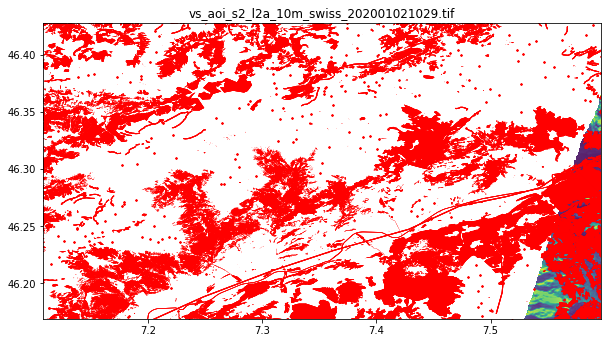

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


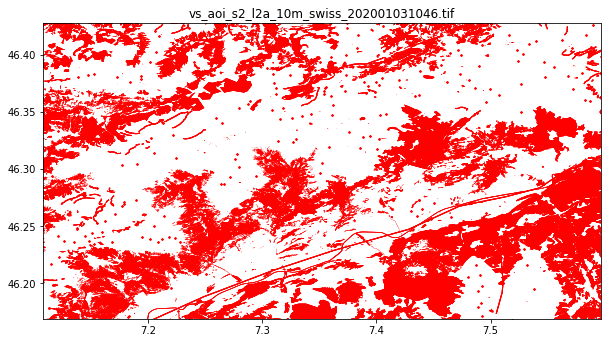

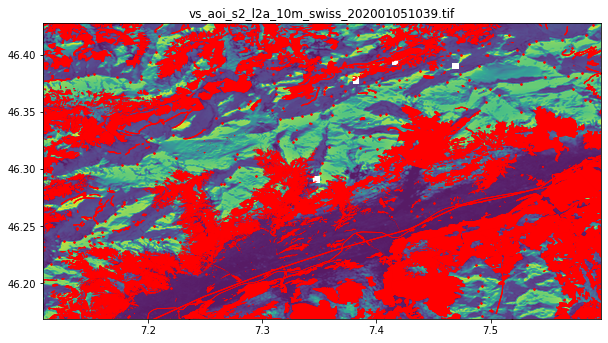

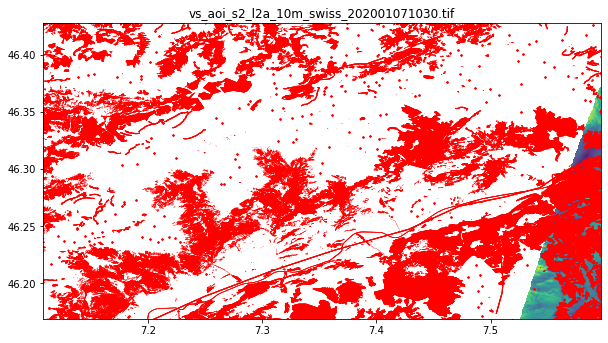

Error in callback <function flush_figures at 0x7fa12f5559e0> (for post_execute):


KeyboardInterrupt: ignored

In [29]:
import gc
import distutils
import distutils.core

st = time.time()
print("starting conversion loop - ", datetime.now())

for tif_imagesfile in tqdm(approved_files, total=len(approved_files),
                      desc=" tif_images"):
    
    try:
        image_with_interesting_points(join(tif_imagess_dir_path, 
                                           tif_imagesfile), output_path_full,
                                      df_storage=df_storage)
    except:
        print("warning, needed to skip file {}".format(tif_imagesfile))
        
    move2completed(from_dir=tif_imagess_dir_path, filename=tif_imagesfile, verbose=False,
                new_folder='already_gone_thru_conv')
    gc.collect()

    # save a copy of the current  outputs to drive
    distutils.dir_util.copy_tree(output_path_full, drive_save_folder)
    
    
print("conversion completed - ", datetime.now())

Can [customize](https://katna.readthedocs.io/en/latest/how_to_guide.html#katna-custom-writers) how keyframes are extracted in the future


In [ ]:
rt = (time.time() - st) / 60
print("Total runtime was: ", format(round(rt, 2)))

## download zip

In [ ]:
from zipfile import ZipFile
import os
from os.path import basename
# create a ZipFile object

zip_file_name = "TIF_to_PNG_CONV_" + datetime.now().strftime("%d%m%Y") + ".zip"

zip_directory = output_path_full 

# ---------------------
# use try and except to avoid jupyter notebook re-runs causing the zip to 
# grow far past originally intended # of files

try:

    contents = zipObj.namelist()
    print("there is already an existing zipfile with the following: \n")
    pp.pprint(contents)

    download_again = str(input("Download the file again? (y/n, default n)-->")).lower()

    if download_again == 'y':
        files.download(zip_file_name)
except:

    print("no zip object exists yet, creating one")

    file_count = 0
    with ZipFile(zip_file_name, 'w') as zipObj:
        # Iterate over all the files in directory
        for folderName, subfolders, filenames in os.walk(zip_directory):
            for filename in filenames:
                #create complete filepath of file in directory
                filePath = os.path.join(folderName, filename)
                # Add file to zip
                zipObj.write(filePath, basename(filePath))
                file_count += 1

    print("finished zipping {} files", file_count)

    
    if download_files:
        files.download(zip_file_name)
        print("downloaded files - ", datetime.now())
    else:
        print("download_output_files is set to: ", download_files)
